In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def fictitiousplay(M1, M2, a1, a2, N):
    n_actions_p1 = M1.shape[0] # number of actions for player 1
    n_actions_p2 = M1.shape[1] # number of actions for player 2
    A1 = np.zeros(N, dtype=int) # actions for player 1
    A2 = np.zeros(N, dtype=int) # actions for player 2
    sum_U1 = np.zeros(N) # cumulative utility for player 1
    sum_U2 = np.zeros(N) # cumulative utility for player 2
    aver_U1 = np.zeros(N) # average utility for player 1
    aver_U2 = np.zeros(N) # average utility for player 2

    count1 = np.zeros(n_actions_p1)  # count of actions for player 1
    count2 = np.zeros(n_actions_p2)  # count of actions for player 2
    
    A1[0] = a1
    A2[0] = a2
    sum_U1[0] = M1[A1[0], A2[0]]
    sum_U2[0] = M2[A1[0], A2[0]]
    aver_U1[0] = sum_U1[0]
    aver_U2[0] = sum_U2[0]
    count1[a1] += 1
    count2[a2] += 1
    
    def best_response(rewards):
        max_val = np.max(rewards) # find the maximum value
        best_actions = np.flatnonzero(np.isclose(rewards, max_val)) # find the best actions
        return np.random.choice(best_actions) # randomly choose one of the best actions

    for t in range(N):
        q2 = count2 / np.sum(count2)
        q1 = count1 / np.sum(count1)
        
        if t<= N-2:
            exp_payoffs1 = M1.dot(q2) # expected payoffs
            A1[t+1] = best_response(exp_payoffs1) # best response
            sum_U1[t+1] = sum_U1[t] + M1[A1[t+1], A2[t+1]] # cumulative utility
            aver_U1[t+1] = sum_U1[t+1] / (t+1) # average utility
            count1[A1[t+1]] += 1 # count of actions

        if t<= N-2:
            exp_payoffs2 = M2.T.dot(q1)
            A2[t+1] = best_response(exp_payoffs2)       
            sum_U2[t+1] = sum_U2[t] + M2[A1[t+1], A2[t+1]]
            aver_U2[t+1] = sum_U2[t+1] / (t+1)
            count2[A2[t+1]] += 1

    plt.figure(figsize=(8, 4))
    plt.plot(aver_U1, label=f'Player 1: {aver_U1[-1]}')
    plt.plot(aver_U2, label=f'Player 2: {aver_U2[-1]}')
    plt.title(f'a1 = {a1}, a2 = {a2}')
    plt.xlabel('Time')
    plt.ylabel('Utility')
    plt.legend()

    return A1, A2

In [9]:
def empirical_frequency(A, n_actions): #empirical frequency of actions
    length = len(A)
    freq = np.zeros((length, n_actions), dtype=float)
    count = np.zeros(n_actions, dtype=int)
    
    for t in range(length):
        action = A[t]
        count[action] += 1 # count of each action
        freq[t] = count / (t + 1)  # frequency of each action
    
    return freq


1.

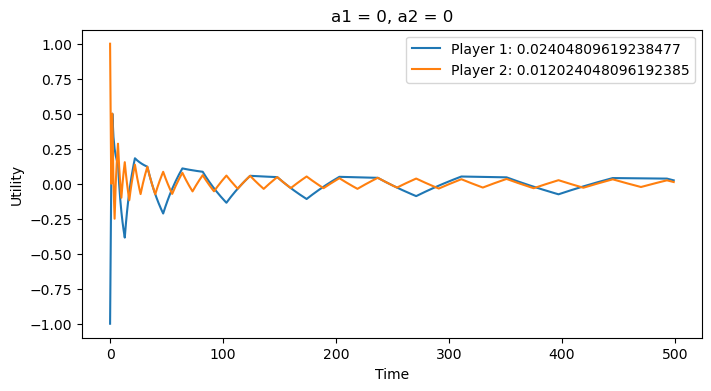

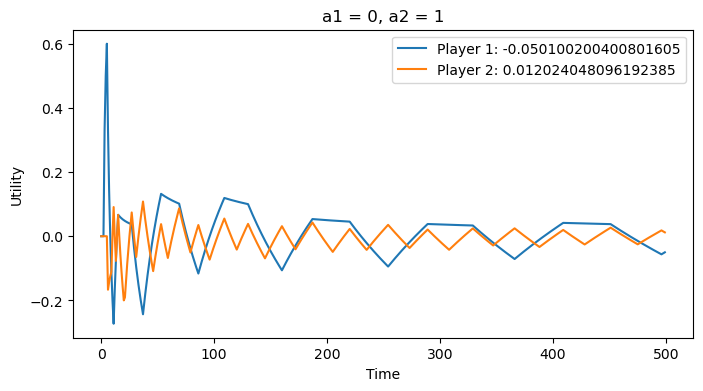

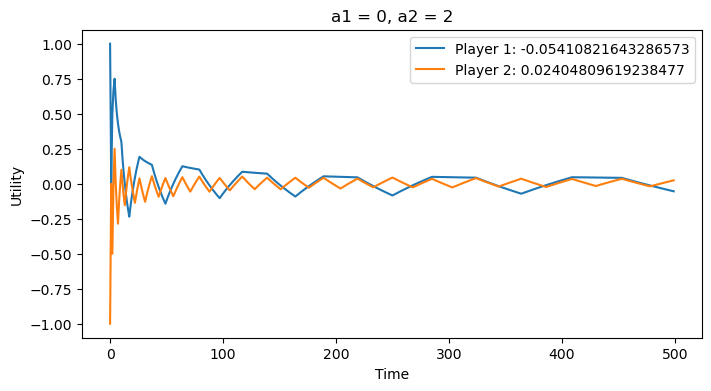

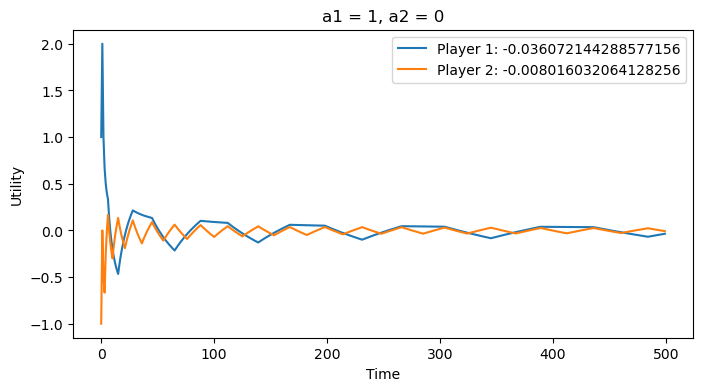

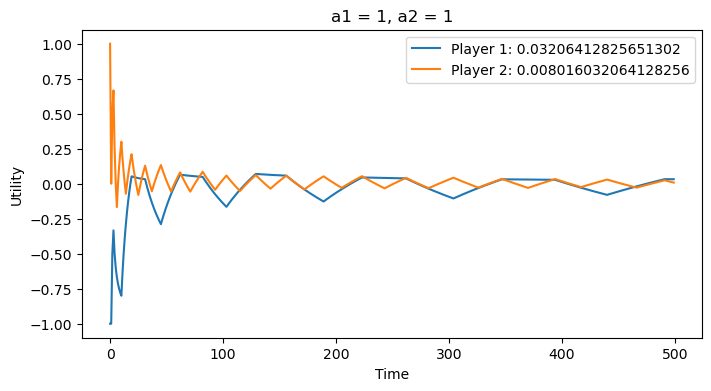

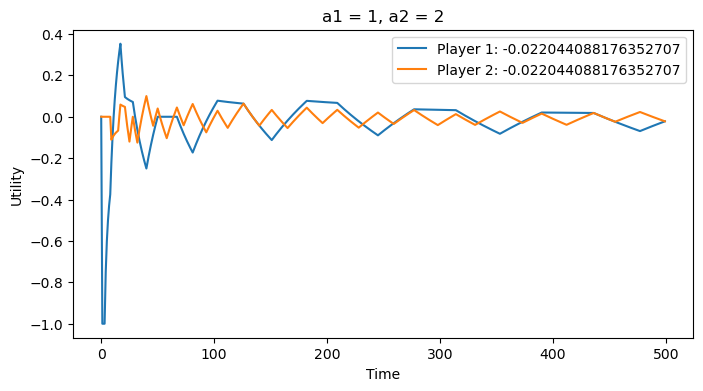

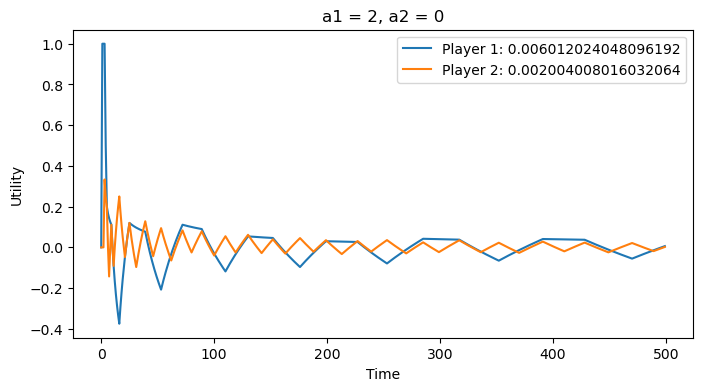

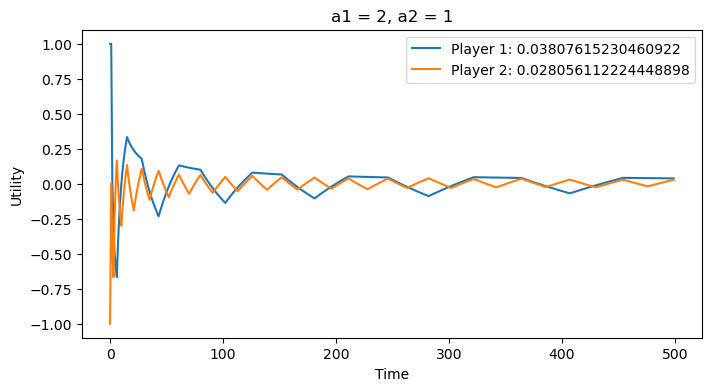

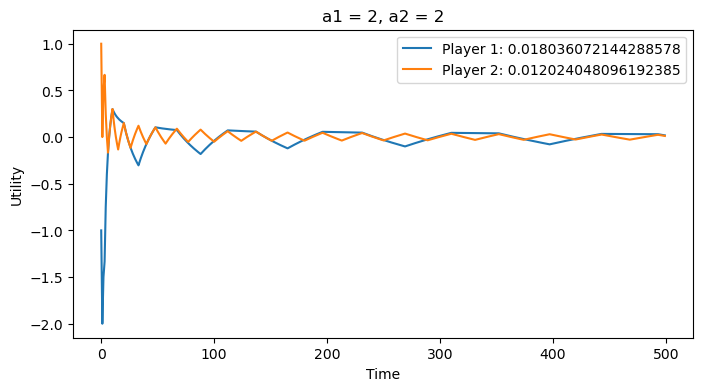

In [10]:
M1 = np.array(
    [[-1, 0, 1],
     [1, -1, 0],
     [0, 1, -1]]
)
M2 = -M1
N = 500

for a1 in range(3):
    for a2 in range(3):
        A1, A2 = fictitiousplay(M1, M2, a1, a2, N)

The average utility for each player converges to 0.  
It can be verified that the result is the same as the value of the game.

2.  
(a)

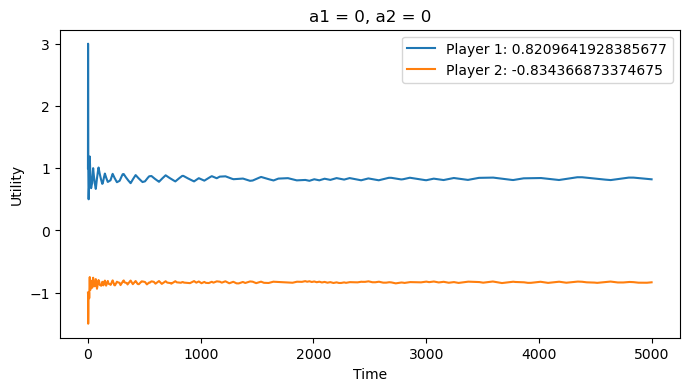

In [11]:
M1 = np.array(
    [[1,0,0,0],
     [2,1,0,0],
     [1,2,1,0],
     [0,1,2,1],
     [0,0,1,2],
     [0,0,0,1]]
)
M2 = -M1
N = 5000

a1 = 0
a2 = 0
A1, A2 = fictitiousplay(M1, M2, a1, a2, N)

The average payoffs of player 1 converge to 0.81, around the value of the game 5/6.  
The average payoffs of player 2 converge to -0.82, around minus the value of the game -5/6.

(b)

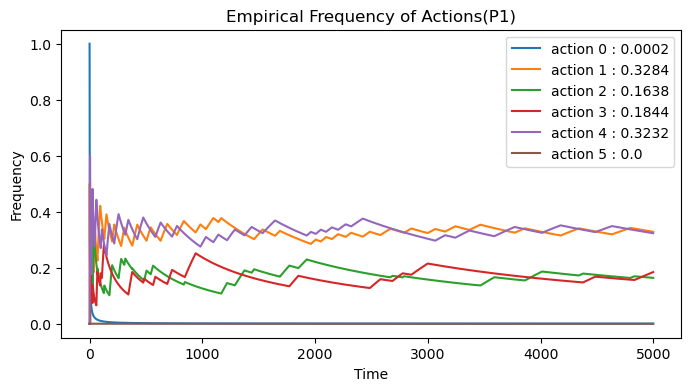

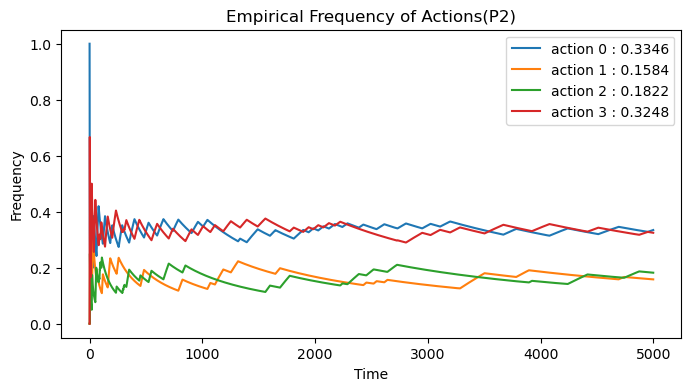

In [12]:
freq_matrix1 = empirical_frequency(A1, M1.shape[0])
plt.figure(figsize=(8, 4))
plt.title('Empirical Frequency of Actions(P1)')
plt.xlabel('Time')
plt.ylabel('Frequency')
for i in range(M1.shape[0]):
    plt.plot(freq_matrix1[:, i], label=f'action {i} : {freq_matrix1[-1, i]}')
plt.legend()

freq_matrix2 = empirical_frequency(A2, M1.shape[1])
plt.figure(figsize=(8, 4))
plt.title('Empirical Frequency of Actions(P2)')
plt.xlabel('Time')
plt.ylabel('Frequency')
for i in range(M1.shape[1]):
    plt.plot(freq_matrix2[:, i], label=f'action {i} : {freq_matrix2[-1, i]}')
plt.legend()

The empirical frequency of actions converge to around (0, 1/3, 1/6, 1/6, 1/3, 0) over actions of player 1 and around (1/3, 1/6, 1/6, 1/3) over actions of player 2.  
It can be verified that the result is the mixed security strategies of the players.